<a href="https://colab.research.google.com/github/NakkanaBharathi/FUTURE_ML_02/blob/main/Tak2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


In [6]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() <= 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)


In [7]:
df = df.fillna(df.median())

In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

In [12]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': model.score(X_test, y_test),
        'ROC-AUC': roc_auc_score(y_test, y_pred)
    }
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409


XGBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
we

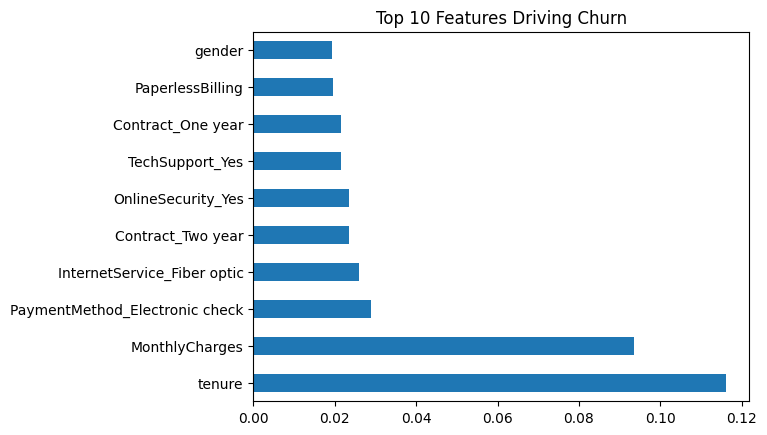

In [13]:
feat_importances = pd.Series(
    models["Random Forest"].feature_importances_, index=X.columns
)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Driving Churn")
plt.show()

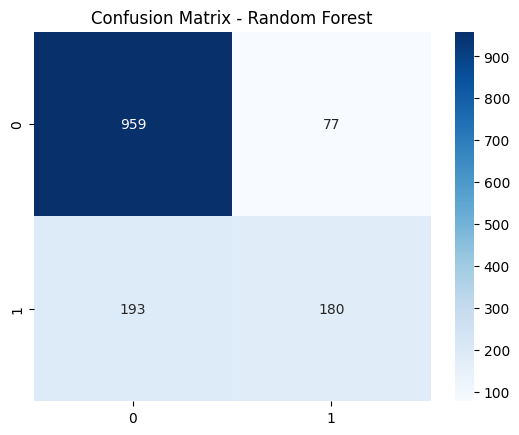

In [14]:
y_pred_rf = models["Random Forest"].predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

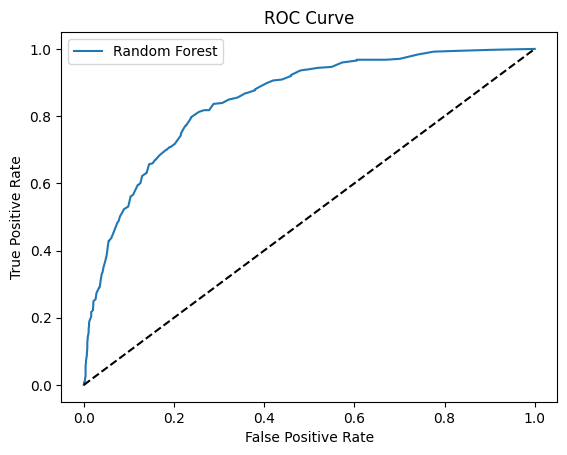

In [15]:
y_prob = models["Random Forest"].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()